## V243: Thermisches Rauschen - Messung der Boltzmannkonstante

### 3.1 Importieren und graphische Darstellung der Messdaten

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Einlesen der Messdaten von Frequenz f[Hz] und Ausgangsspannung U_aus[mV]

f, U_aus = np.loadtxt('/home/jan/Dokumente/SS 2018/PAP 2.2/V243/HTFrequenzgang.dat', 
                      skiprows=1, usecols=(0,1), unpack=True)

D = 1e-3
U_ein = 0.2
g = U_aus/(U_ein*D)

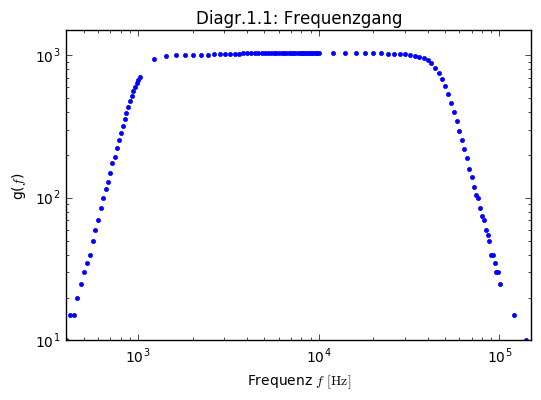

In [13]:
#Plotten des Frequenzgangs

plt.loglog(f,g, linestyle ='none', marker='.')
plt.axis([4e2,1.5e5,10,1.5e3])
plt.xlabel('Frequenz $f\ [\mathrm{Hz}]$')
plt.ylabel('g($f$)')
plt.title('Diagr.1.1: Frequenzgang')
plt.savefig('/home/jan/Dokumente/SS 2018/PAP 2.2/V243/Diagr_11.jpeg', format = 'jpeg', dpi = 400)

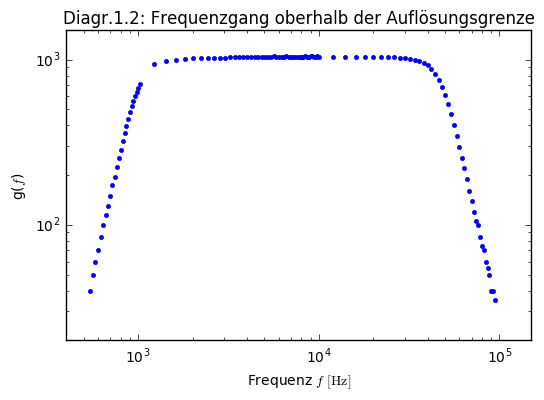

In [14]:
#Plotten des Frequenzgangs ohne Daten außerhalb der Auflösungsgrenze

plt.loglog(f[22:-47],g[22:-47], linestyle ='none', marker='.')
plt.axis([4e2,1.5e5,20,1.5e3])
plt.xlabel('Frequenz $f\ [\mathrm{Hz}]$')
plt.ylabel('g($f$)')
plt.title('Diagr.1.2: Frequenzgang oberhalb der Auflösungsgrenze')
plt.savefig('/home/jan/Dokumente/SS 2018/PAP 2.2/V243/Diagr_12.jpeg', format = 'jpeg', dpi = 400)

### 3.2 Funktion anpassen

Fitparameter: 
V = (1032.646 +- 1.010), 
W1 = (1029.711 +- 1.894), W2 = (46672.066 +- 82.154), 
n1 = (4.903 +- 0.048), n2 = (4.794 +- 0.040)


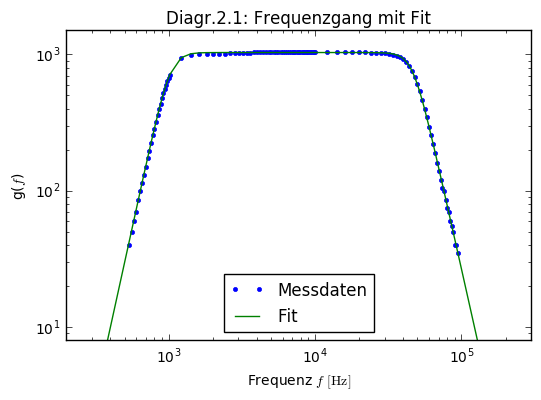

In [15]:
from scipy.optimize import curve_fit

#Verstärkung V, untere Grenzfrequenz W1, obere Grenzfrequenz W2, Filterordnung n1, n2

def fitfunction(f,V,W1,W2,n1,n2):
    return V/(np.sqrt(1+1/(f/W1)**(2*n1)) * np.sqrt(1+(f/W2)**(2*n2)))

#Startwerte p0 = [V, W1, W2, n1, n2] für Fitparameter:

p0 = [1000, 1000, 50000, 5, 5]
popt, pcov = curve_fit(fitfunction, f[22:-47], g[22:-47], p0)
perr = np.sqrt(np.diag(pcov)) #Fehler der Fitparameter

#Fitplot der Daten oberhalb der Auflösungsgrenze

plt.loglog(f[22:-47],g[22:-47], linestyle ='none', marker='.', label = 'Messdaten')
plt.loglog(f, fitfunction(f, *popt), label = 'Fit')
plt.axis([2e2,3e5,8,1.5e3])
plt.xlabel('Frequenz $f\ [\mathrm{Hz}]$')
plt.ylabel('g($f$)')
plt.title('Diagr.2.1: Frequenzgang mit Fit')
plt.legend(loc='best')
plt.savefig('/home/jan/Dokumente/SS 2018/PAP 2.2/V243/Diagr_21.jpeg', format = 'jpeg', dpi = 400)

print('Fitparameter: \nV = ({:.3f} +- {:.3f}), \nW1 = ({:.3f} +- {:.3f}), W2 = ({:.3f} +- {:.3f}), \nn1 = ({:.3f} +- {:.3f}), n2 = ({:.3f} +- {:.3f})' .format(popt[0],perr[0],popt[1],perr[1],popt[2],perr[2],popt[3],perr[3],popt[4],perr[4]))


### 3.3 Numerische Integration der Rauschbreite B

In [17]:
from scipy import integrate

ffsquared = lambda f,V,W1,W2,n1,n2: fitfunction(f,V,W1,W2,n1,n2)**2
B = integrate.quad(ffsquared, f[22], f[-47], args = tuple(popt))

print('Die Rauschbandbreite B beträgt: {value:.4e} Hz'.format(value=B[0]))

Die Rauschbandbreite B beträgt: 4.9542e+10 Hz


### 3.4 Bestimmung der Boltzmannkonstante

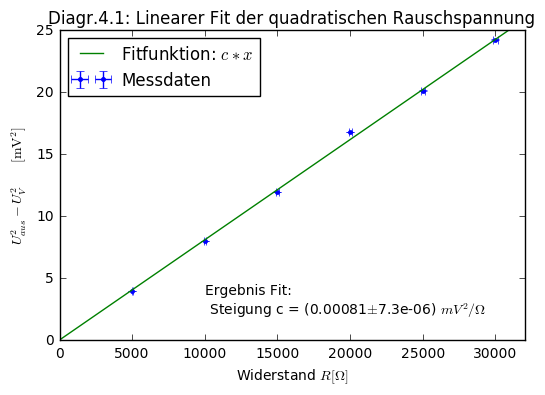

In [29]:
R = np.array([5e3,10e3,15e3,20e3,25e3,30e3]) #Widerstand R[Ohm]
err_R = np.array([30,50,80,100,130,150])
U_aus = np.array([2.4214,3.1413,3.7230,4.3245,4.6923,5.1117]) #Rauschspannung U_r[mV]
err_U_aus = np.array([0.0009,0.0013,0.0012,0.0015,0.0017,0.0020])
U_V = 1.3802
err_U_V = 0.0008

D = U_aus**2 - U_V**2
err_D = 2*np.sqrt((U_aus*err_U_aus)**2+(U_V*err_U_V)**2)

plt.errorbar(R, D, xerr = err_R, yerr = err_D, fmt='.', label = 'Messdaten')
plt.axis([0,3.2e4,0,25])

def linear(x,c):
    return c*x

x = np.linspace(0,3.2e4, 10000)
popt, pcov =  curve_fit(linear, R, D, sigma = err_D)

c = popt[0]
err_c = np.sqrt(pcov[0,0])

#Fit-Plot
plt.plot(x, linear(x, *popt), label = 'Fitfunktion: $c*x$')
plt.xlabel('Widerstand $R[\Omega]$')
plt.ylabel('$U_{aus}^2-U_V^2 \qquad [\mathrm{mV^2}]$')
plt.title('Diagr.4.1: Linearer Fit der quadratischen Rauschspannung')
plt.annotate('Ergebnis Fit: \n Steigung c = ('+str(round(popt[0],5))+'$\pm$'+str(round(np.sqrt(pcov[0,0]),7))+') $mV^2/\Omega$', (10000,2))
plt.text(600,22,'c=({:.3f}$\pm${:.3f})e-04 $mV^2/\Omega$'.format (c*1e4, err_c*1e4), fontsize = '9')
plt.legend(loc='best')

In [40]:
#Berechnung der chi2-Summe

chisquare = np.sum(((linear(R,*popt)-D)**2/err_D**2))
dof = 5 #degrees of freedom = 6-1
chisquare_red = chisquare/dof
print('\u03c7^2 = {:.2f}'.format(chisquare),'\n','\u03c7_red^2 = {:.2f}'.format(chisquare_red))

#Berechnung der Fitwahrscheinlichkeit

from scipy.stats import chi2
prob=round(1-chi2.cdf(chisquare, dof),2)*100
print('Fitwahrscheinlichkeit P = '+str(prob) + '%')

#Berechnung der Boltzmannkonstante

T = 273.15 + 23.3 #Raumtemperatur T[K]
err_T = 0.1

k = (c*1e-6)/(4*T*B[0])
err_k_stat = np.sqrt((err_c/c)**2 + (err_T/T)**2)*k
err_k_syst = 0.02*k
print('k = ({:.3f} +- {:.3f} stat. +- {:.3f} syst.) e-23 J/K'.format(k*1e23, err_k_stat*1e23, err_k_syst*1e23))

χ^2 = 3158.21 
 χ_red^2 = 631.64
Fitwahrscheinlichkeit P = 0.0%
k = (1.376 +- 0.012 stat. +- 0.028 syst.) e-23 J/K
